In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [3]:
import pytorch_optimizer as optim

In [4]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [5]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [6]:
CIFAR_train = torchvision.datasets.CIFAR100('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR100('./', download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [7]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [8]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(19) tensor(29) tensor(0) tensor(11) tensor(1) tensor(86) tensor(90) tensor(28) tensor(23) tensor(31) 

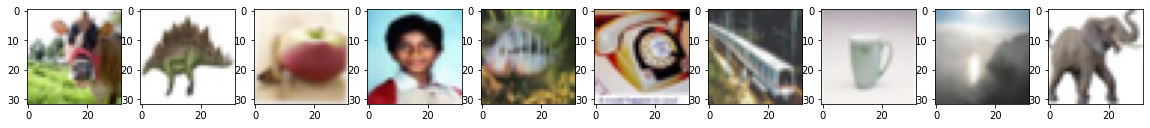

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [10]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [25]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(net.parameters(), lr=1.0e-3)
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters(), lr=0.001)
    #optimizer = optim.AdaBelief(net.parameters())
    #optimizer = optim.DiffGrad(net.parameters())
    optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        
        #if epoch == 15:
            #print("lr=1.0e-4")
            #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)
            

        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")
    
    del net

    return test_accuracy_history, test_loss_history

In [12]:
accuracies = {}
losses = {}

In [13]:
from torchvision.models import vgg16, VGG16_Weights
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [14]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+SGD'], losses['vgg16+SGD'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:45<00:00,  5.45it/s]


accuracy =  0.02019999921321869



epoch  1


100%|██████████| 250/250 [00:40<00:00,  6.17it/s]


accuracy =  0.05179999768733978



epoch  2


100%|██████████| 250/250 [00:39<00:00,  6.27it/s]


accuracy =  0.10579999536275864



epoch  3


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.14069999754428864



epoch  4


100%|██████████| 250/250 [00:40<00:00,  6.21it/s]


accuracy =  0.17249999940395355



epoch  5


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.21729999780654907



epoch  6


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.2475999891757965



epoch  7


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.27889999747276306



epoch  8


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.30300000309944153



epoch  9


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.3147999942302704



epoch  10


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.337799996137619



epoch  11


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.35599997639656067



epoch  12


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.37279999256134033



epoch  13


100%|██████████| 250/250 [00:40<00:00,  6.19it/s]


accuracy =  0.383899986743927



epoch  14


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.40149998664855957



epoch  15


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.4071999788284302



epoch  16


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.42389997839927673



epoch  17


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.42819997668266296



epoch  18


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.43289998173713684



epoch  19


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.447299987077713





In [16]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+Adam'], losses['vgg16+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:48<00:00,  5.11it/s]


accuracy =  0.039400000125169754



epoch  1


100%|██████████| 250/250 [00:47<00:00,  5.22it/s]


accuracy =  0.0722000002861023



epoch  2


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.15269999206066132



epoch  3


100%|██████████| 250/250 [00:48<00:00,  5.18it/s]


accuracy =  0.20709998905658722



epoch  4


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.2272000014781952



epoch  5


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.28299999237060547



epoch  6


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.3264999985694885



epoch  7


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.3474999964237213



epoch  8


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.36139997839927673



epoch  9


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.39079999923706055



epoch  10


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.4090999960899353



epoch  11


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.4131999909877777



epoch  12


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.43619999289512634



epoch  13


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.42239999771118164



epoch  14


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.4465999901294708



epoch  15


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.4503999948501587



epoch  16


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.4587000012397766



epoch  17


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.45069998502731323



epoch  18


100%|██████████| 250/250 [00:48<00:00,  5.20it/s]


accuracy =  0.45619997382164



epoch  19


100%|██████████| 250/250 [00:48<00:00,  5.19it/s]


accuracy =  0.4650999903678894





In [18]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+PNMBelief'], losses['vgg16+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:58<00:00,  4.28it/s]


accuracy =  0.02279999852180481



epoch  1


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.032899998128414154



epoch  2


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.09259999543428421



epoch  3


100%|██████████| 250/250 [00:58<00:00,  4.29it/s]


accuracy =  0.16689999401569366



epoch  4


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.20569999516010284



epoch  5


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.2807999849319458



epoch  6


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.3312000036239624



epoch  7


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.38659998774528503



epoch  8


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.3889999985694885



epoch  9


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.44859999418258667



epoch  10


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.47919997572898865



epoch  11


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.4925999939441681



epoch  12


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.5008000135421753



epoch  13


100%|██████████| 250/250 [00:58<00:00,  4.29it/s]


accuracy =  0.5227000117301941



epoch  14


100%|██████████| 250/250 [00:58<00:00,  4.30it/s]


accuracy =  0.5146999955177307



epoch  15


100%|██████████| 250/250 [00:58<00:00,  4.29it/s]


accuracy =  0.5248000025749207



epoch  16


100%|██████████| 250/250 [00:58<00:00,  4.29it/s]


accuracy =  0.5250999927520752



epoch  17


100%|██████████| 250/250 [00:58<00:00,  4.28it/s]


accuracy =  0.53329998254776



epoch  18


100%|██████████| 250/250 [00:58<00:00,  4.31it/s]


accuracy =  0.5486999750137329



epoch  19


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.5432000160217285





In [20]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+YogiPNM'], losses['vgg16+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:59<00:00,  4.21it/s]


accuracy =  0.04099999740719795



epoch  1


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.08419999480247498



epoch  2


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.1630999892950058



epoch  3


100%|██████████| 250/250 [00:59<00:00,  4.23it/s]


accuracy =  0.23909999430179596



epoch  4


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.3418999910354614



epoch  5


100%|██████████| 250/250 [00:59<00:00,  4.24it/s]


accuracy =  0.40209999680519104



epoch  6


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.4666000008583069



epoch  7


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.4643999934196472



epoch  8


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.5310999751091003



epoch  9


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.535099983215332



epoch  10


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.553600013256073



epoch  11


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.5539999604225159



epoch  12


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.5699999928474426



epoch  13


100%|██████████| 250/250 [00:59<00:00,  4.23it/s]


accuracy =  0.5715999603271484



epoch  14


100%|██████████| 250/250 [00:59<00:00,  4.24it/s]


accuracy =  0.5687999725341797



epoch  15


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.5730000138282776



epoch  16


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.5440999865531921



epoch  17


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.5781999826431274



epoch  18


100%|██████████| 250/250 [00:59<00:00,  4.23it/s]


accuracy =  0.5796999931335449



epoch  19


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.5769999623298645





In [22]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+AdaBelief'], losses['vgg16+AdaBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:55<00:00,  4.51it/s]


accuracy =  0.382999986410141



epoch  1


100%|██████████| 250/250 [00:54<00:00,  4.55it/s]


accuracy =  0.4747999906539917



epoch  2


100%|██████████| 250/250 [00:55<00:00,  4.51it/s]


accuracy =  0.5072999596595764



epoch  3


100%|██████████| 250/250 [00:55<00:00,  4.54it/s]


accuracy =  0.5188999772071838



epoch  4


100%|██████████| 250/250 [00:54<00:00,  4.55it/s]


accuracy =  0.5443999767303467



epoch  5


100%|██████████| 250/250 [00:55<00:00,  4.54it/s]


accuracy =  0.5468999743461609



epoch  6


100%|██████████| 250/250 [00:54<00:00,  4.55it/s]


accuracy =  0.5442000031471252



epoch  7


100%|██████████| 250/250 [00:54<00:00,  4.56it/s]


accuracy =  0.5386999845504761



epoch  8


100%|██████████| 250/250 [00:54<00:00,  4.57it/s]


accuracy =  0.5485000014305115



epoch  9


100%|██████████| 250/250 [00:54<00:00,  4.56it/s]


accuracy =  0.5302000045776367



epoch  10


100%|██████████| 250/250 [00:54<00:00,  4.58it/s]


accuracy =  0.538100004196167



epoch  11


100%|██████████| 250/250 [00:54<00:00,  4.55it/s]


accuracy =  0.5271999835968018



epoch  12


100%|██████████| 250/250 [00:54<00:00,  4.57it/s]


accuracy =  0.5173999667167664



epoch  13


100%|██████████| 250/250 [00:54<00:00,  4.57it/s]


accuracy =  0.5328999757766724



epoch  14


100%|██████████| 250/250 [00:54<00:00,  4.58it/s]


accuracy =  0.517799973487854



epoch  15


100%|██████████| 250/250 [00:54<00:00,  4.58it/s]


accuracy =  0.5184000134468079



epoch  16


100%|██████████| 250/250 [00:54<00:00,  4.58it/s]


accuracy =  0.498199999332428



epoch  17


100%|██████████| 250/250 [00:54<00:00,  4.59it/s]


accuracy =  0.5098999738693237



epoch  18


100%|██████████| 250/250 [00:54<00:00,  4.57it/s]


accuracy =  0.4982999861240387



epoch  19


100%|██████████| 250/250 [00:54<00:00,  4.59it/s]


accuracy =  0.49789997935295105





In [24]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+DiffGrad'], losses['vgg16+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:59<00:00,  4.23it/s]


accuracy =  0.07039999961853027



epoch  1


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.22759999334812164



epoch  2


100%|██████████| 250/250 [00:58<00:00,  4.24it/s]


accuracy =  0.3441999852657318



epoch  3


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.4351999759674072



epoch  4


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.4705999791622162



epoch  5


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5112000107765198



epoch  6


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5357999801635742



epoch  7


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5370000004768372



epoch  8


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5498999953269958



epoch  9


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5473999977111816



epoch  10


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5547999739646912



epoch  11


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5526999831199646



epoch  12


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.5543999671936035



epoch  13


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.5658999681472778



epoch  14


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.5608999729156494



epoch  15


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5559999942779541



epoch  16


100%|██████████| 250/250 [00:58<00:00,  4.25it/s]


accuracy =  0.5590000152587891



epoch  17


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.5720999836921692



epoch  18


100%|██████████| 250/250 [00:58<00:00,  4.27it/s]


accuracy =  0.564799964427948



epoch  19


100%|██████████| 250/250 [00:58<00:00,  4.26it/s]


accuracy =  0.5662999749183655





In [26]:
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
accuracies['vgg16+Yogi'], losses['vgg16+Yogi'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.4066999852657318



epoch  1


100%|██████████| 250/250 [00:51<00:00,  4.84it/s]


accuracy =  0.4983999729156494



epoch  2


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.527999997138977



epoch  3


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.5449000000953674



epoch  4


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.5816999673843384



epoch  5


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5734999775886536



epoch  6


100%|██████████| 250/250 [00:51<00:00,  4.87it/s]


accuracy =  0.5862999558448792



epoch  7


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.590399980545044



epoch  8


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.5688999891281128



epoch  9


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5834999680519104



epoch  10


100%|██████████| 250/250 [00:50<00:00,  4.91it/s]


accuracy =  0.5875999927520752



epoch  11


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5860999822616577



epoch  12


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5841999650001526



epoch  13


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5777999758720398



epoch  14


100%|██████████| 250/250 [00:50<00:00,  4.90it/s]


accuracy =  0.5837999582290649



epoch  15


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.585599958896637



epoch  16


100%|██████████| 250/250 [00:50<00:00,  4.90it/s]


accuracy =  0.5771999955177307



epoch  17


100%|██████████| 250/250 [00:51<00:00,  4.89it/s]


accuracy =  0.5738999843597412



epoch  18


100%|██████████| 250/250 [00:50<00:00,  4.92it/s]


accuracy =  0.5800999999046326



epoch  19


100%|██████████| 250/250 [00:51<00:00,  4.88it/s]


accuracy =  0.5928999781608582





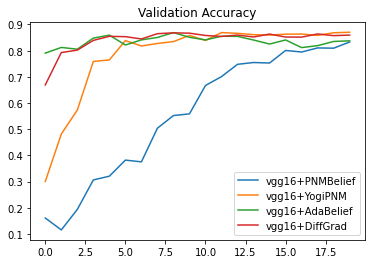

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
    plt.legend()
    plt.title('Validation Accuracy');

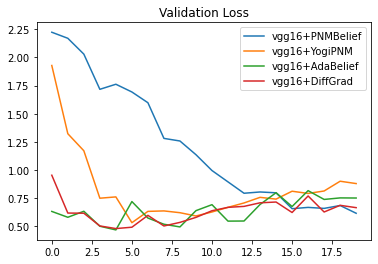

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
    plt.legend()
    plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D